In [2]:
#Thư viện

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] =  [16,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [3]:
#Hàm

def hist(inp):
    plt.figure()
    ac = sns.distplot(inp, color='b')
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure





def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std


In [4]:
# Load data
data = pd.read_csv("Diet_R.csv")
data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [5]:
# Vì Person 25, 26 thiếu dữ liệu ở Gender -> loại bỏ 
dfn = data.drop([0, 1])
dfn

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [6]:
# Sắp xếp index 

df = dfn.set_index('Person')
df = df.sort_index()
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


In [7]:
df.isna().any()

gender          False
Age             False
Height          False
pre.weight      False
Diet            False
weight6weeks    False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 78
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     object 
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   pre.weight    76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.2+ KB


## Task 1: Ignore diet and test to see if weight has been lost

### Phát biểu giả thiết:

$H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [9]:
pre = df['pre.weight']
aft = df['weight6weeks']    

In [10]:

stt, pv = stats.ttest_ind(pre, aft)
print('Giá trị kiểm định = ',stt)
print('pvalue  = ',pv)
if (pv > 0.05):
    print("Không có bằng chứng để bác bỏ H0: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau ")
    print('Điều này ngụ ý là: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau với mức ý nghĩa 5% ')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print(' Cân nặng trung bình của trước và sau khi giảm cân khác nhau')
print('-'*50)

Giá trị kiểm định =  3.0342255247628476
pvalue  =  0.0028431949414180584
đã có đủ bằng chứng để bác bỏ H0: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau
ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%
 Cân nặng trung bình của trước và sau khi giảm cân khác nhau
--------------------------------------------------


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 600x800 with 0 Axes>

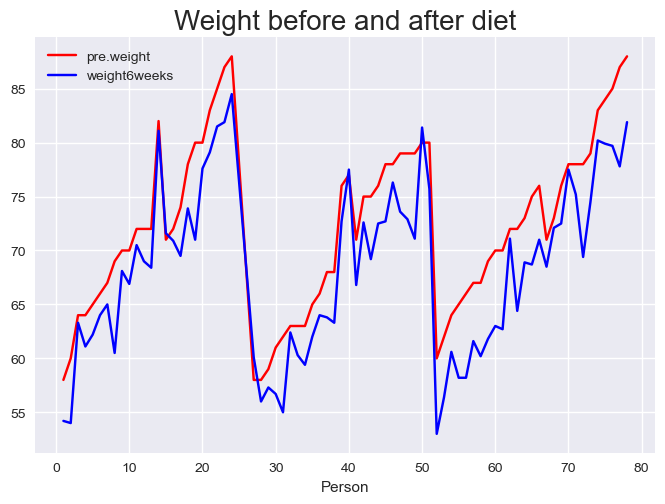

In [11]:
# Biểu đồ cân nặng trước và sau khi giảm cân

plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
df[['pre.weight', 'weight6weeks']].plot(color= ['r', 'b'])
plt.title('Weight before and after diet', fontsize=20)

## Task 2: Remove weight lost and get students to calculate it using before/after weights

In [12]:
df['weightlost'] = pre - aft
lost = df['weightlost']
df

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


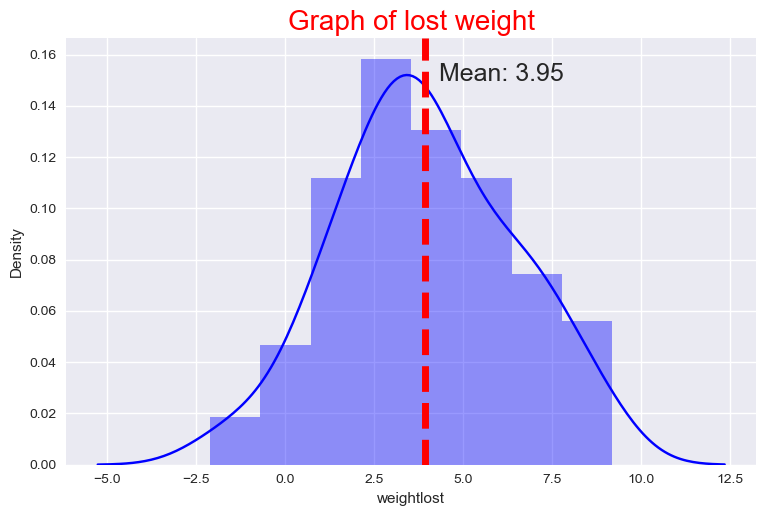

In [13]:
hist(lost)
plt.title('Graph of lost weight', size=20, color='r')
plt.tight_layout()
plt.show()

## Task 3: Summary statistics

In [14]:
df['Diet'].describe()

count    76.000000
mean      2.039474
std       0.823663
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

In [15]:
# Bảng tần số
x = df.groupby('Diet')['Diet'].count()
y = pd.DataFrame(x)
y.columns = ['Số người']
y['Phần trăm'] = y/sum(y['Số người'])*100
y

,Số người,Phần trăm
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


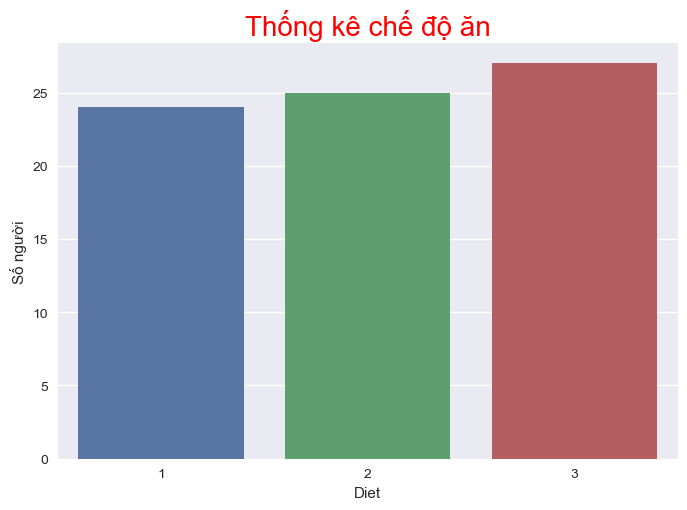

In [16]:
y.reset_index(inplace=True)

ax =sns.barplot(x='Diet',y='Số người',data = y)
plt.title('Thống kê chế độ ăn', size=20, color='r')
plt.show()

### Xây dựng giả thiết:

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

In [17]:
task4 = df[['Diet', 'weightlost']]
task4

,Diet,weightlost
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [18]:
diet = task4.groupby('Diet').groups
# Lấy giá trị tương ứng ở cột des_weight 
type_1 = df['weightlost'][diet[1]]
type_1.name = 'Diet Type 1'
type_2 = df['weightlost'][diet[2]]
type_2.name = 'Diet Type 2'
type_3 = df['weightlost'][diet[3]]
type_3.name = 'Diet Type 3'

print(type_1.describe())
print(type_2.describe())
print(type_3.describe())

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
Name: Diet Type 1, dtype: float64
count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
Name: Diet Type 2, dtype: float64
count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
Name: Diet Type 3, dtype: float64


### Kích thước của các mẫu không bằng nhau nên ta lấy ngẫu nhiên 20 giá trị trong mỗi mẫu. 

In [73]:
type1 = type_1.sample(20)
type2 = type_2.sample(20)
type3 = type_3.sample(20)


## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 



   ## Phát biểu giả thiết:

$H_0$: Diet type 1 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


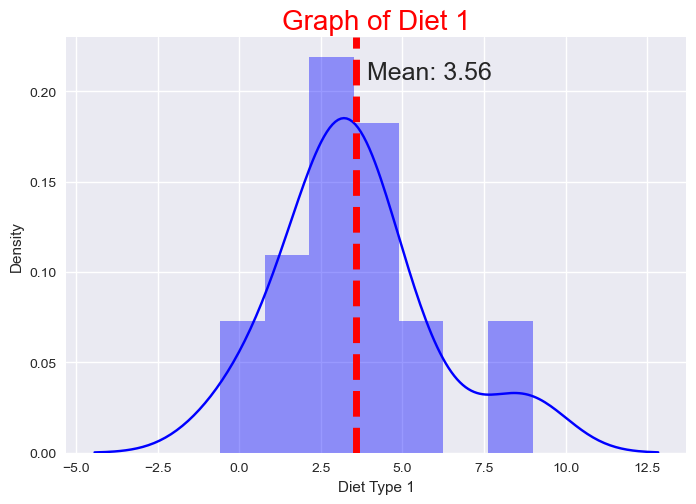

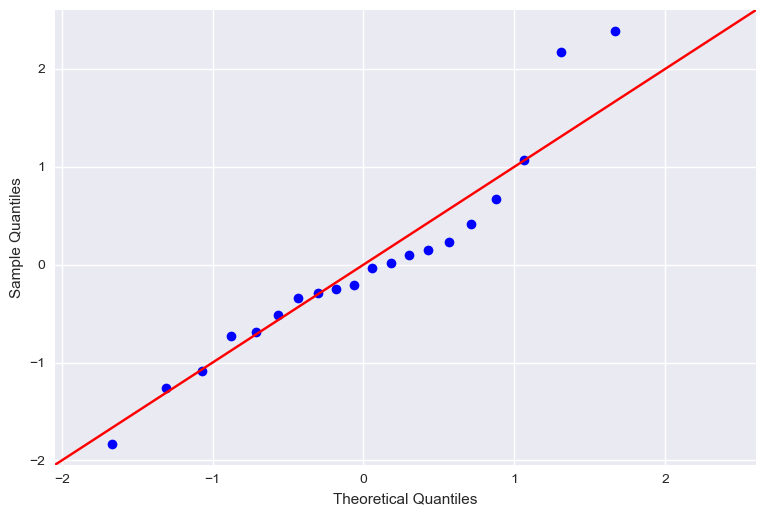

In [74]:
hist(type1)
plt.title('Graph of Diet 1',  size=20, color='r')
sm.qqplot(standadize(type1), line ='45')
plt.tight_layout()
plt.show()

In [75]:
st1, p1 = stats.shapiro(type1)
print('statistic of Diet type 1 = ',st1)
print('pvalue of Diet type 1 = ',p1)
if (p1 > 0.05):
    print("Không có bằng chứng để bác bỏ H0: Diet type 1 là dữ liệu tuân theo phân phối chuẩn ")
    print('Điều này ngụ ý là: Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: Diet type 1 là dữ liệu phân phối chuẩn')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn')
print('-'*50)

statistic of Diet type 1 =  0.9353079199790955
pvalue of Diet type 1 =  0.19523867964744568
Không có bằng chứng để bác bỏ H0: Diet type 1 là dữ liệu tuân theo phân phối chuẩn 
Điều này ngụ ý là: Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


   ## Phát biểu giả thiết:

$H_0$: Diet type 2 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


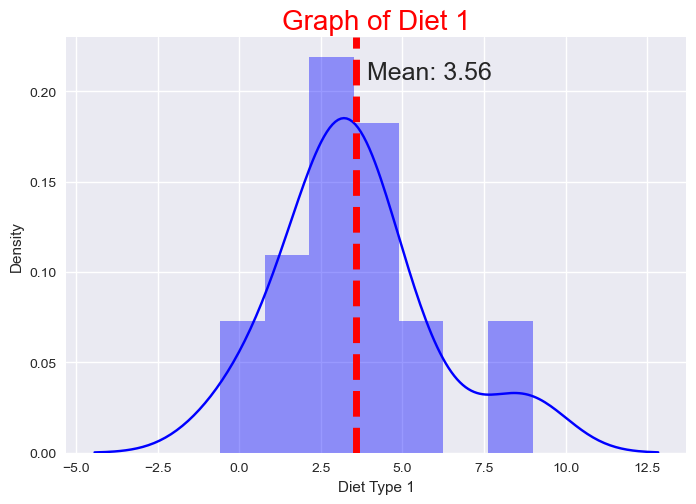

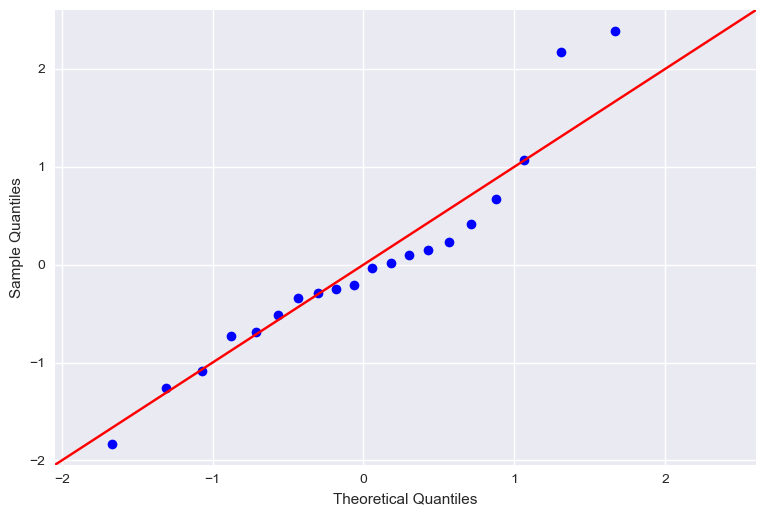

In [76]:
hist(type1)
plt.title('Graph of Diet 1', size=20, color='r')
sm.qqplot(standadize(type1), line ='45')
plt.tight_layout()
plt.show()

In [77]:
st2, p2 = stats.shapiro(type2)
print('statistic of Diet type 2 = ',st2)
print('pvalue of Diet type 2 = ',p2)
if (p2 > 0.05):
    print("Không có bằng chứng để bác bỏ H0: Diet type 2 là dữ liệu tuân theo phân phối chuẩn ")
    print('Điều này ngụ ý là: Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: Diet type 2 là dữ liệu phân phối chuẩn')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn')
print('-'*50)

statistic of Diet type 2 =  0.9462376236915588
pvalue of Diet type 2 =  0.3135594129562378
Không có bằng chứng để bác bỏ H0: Diet type 2 là dữ liệu tuân theo phân phối chuẩn 
Điều này ngụ ý là: Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


  ##  Phát biểu giả thiết:

$H_0$: Diet type 3 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


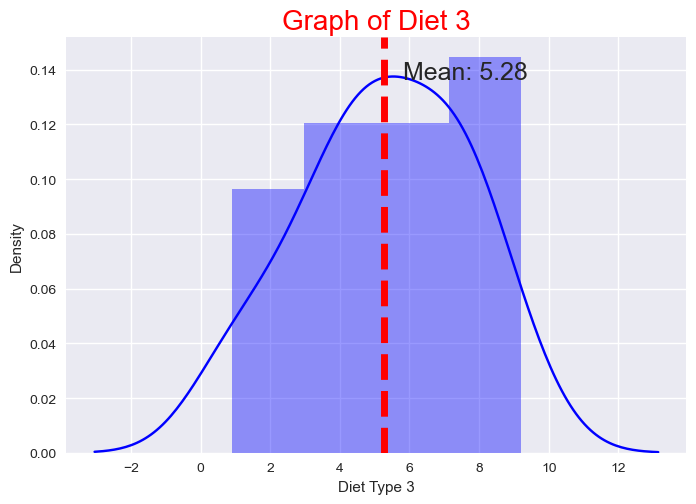

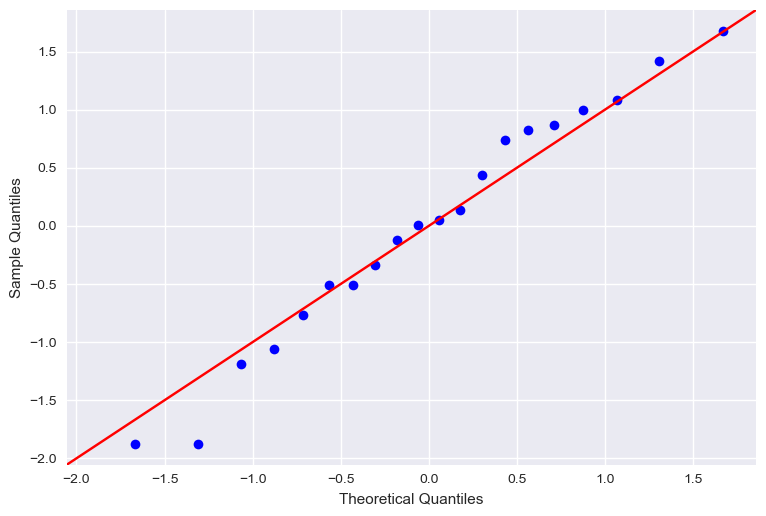

In [78]:
hist(type3)
plt.title('Graph of Diet 3',  size=20, color='r')
sm.qqplot(standadize(type3), line ='45')
plt.tight_layout()
plt.show()

In [79]:
st3, p3 = stats.shapiro(type3)
print('statistic of Diet type 3 = ',st3)
print('pvalue of Diet type 13 = ',p3)
if (p3 > 0.05):
    print("Không có bằng chứng để bác bỏ H0: Diet type 3 là dữ liệu tuân theo phân phối chuẩn ")
    print('Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: Diet type 3 là dữ liệu phân phối chuẩn')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn')
print('-'*50)

statistic of Diet type 3 =  0.967763364315033
pvalue of Diet type 13 =  0.7071208953857422
Không có bằng chứng để bác bỏ H0: Diet type 3 là dữ liệu tuân theo phân phối chuẩn 
Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

 ### Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [80]:
st13, p13 = stats.bartlett(type1, type2, type3)
print('statistic by Bartlett = ',st13)
print('pvalue by Bartlett = ',p13)
if (p13 > 0.05):
    print('Không có bằng chứng để bác bỏ H0: Các feature đều có phương sai đồng nhất')
    print('Điều này ngụ ý: Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho: Các feature đều có phương sai đồng nhất')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')
print('-'*50)

statistic by Bartlett =  0.022427289684516478
pvalue by Bartlett =  0.9888489937189108
Không có bằng chứng để bác bỏ H0: Các feature đều có phương sai đồng nhất
Điều này ngụ ý: Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA
--------------------------------------------------


### Phân tích ANOVA one way

 ### Phát biểu giả thiết:
 

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [81]:
# Tiến hành phân tích ANOVA 1 chiềup={}
from scipy.stats import f_oneway
st, p = f_oneway(type1, type2, type3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")
    print("Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt")

Giá trị kiểm định:  4.522388499381366
p_value:  0.015032692032602433
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


### Hậu kiểm ANOVA

In [82]:
# Hậu kiểm ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['weightlost'],
                          groups=df['Diet'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.032,0.9,-1.6531,1.5891,False
1,3,1.8481,0.0188,0.2567,3.4396,True
2,3,1.8801,0.0152,0.3057,3.4546,True


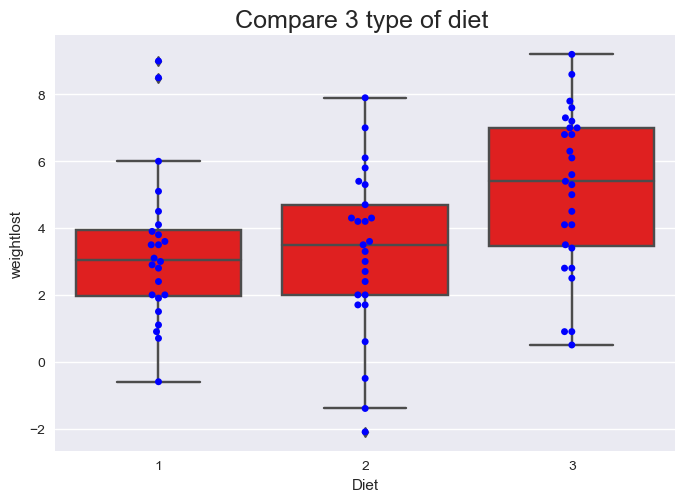

In [91]:
# Kỹ thuật EDA:
sns.boxplot(x='Diet', y='weightlost', data=df, color='red')
sns.swarmplot(x="Diet", y="weightlost", data=df, color='blue')
plt.title('Compare 3 type of diet ', size=18)
plt.show()

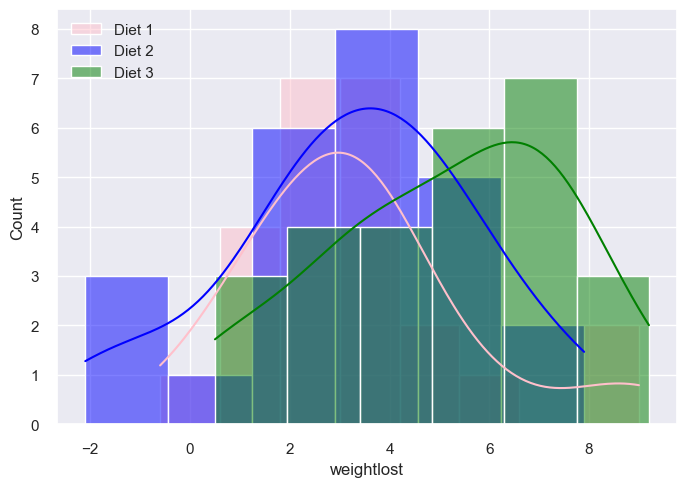

In [176]:
ty1 = df[df['Diet'] == 1]
ty2 = df[df['Diet'] == 2]
ty3 = df[df['Diet'] == 3]


sns.set(style='darkgrid')
sns.histplot(data = ty1, x  ="weightlost", color="pink", label = "Diet 1", kde=True)
sns.histplot(data = ty2, x = "weightlost", color="blue", label = "Diet 2", kde=True)
sns.histplot(data = ty3, x  ="weightlost", color="green", label = "Diet 3", kde=True)
plt.legend()
plt.show()

## Kiểm tra các điều kiện cho kiểm định Anova

In [126]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [127]:
model = ols('weightlost ~ C(Diet)', data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


### 4.2: Are there gender differences for weight lost?

- Xây dựng giả thuyết 

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [128]:
dt = df[['gender', 'weightlost']]
dt

,gender,weightlost
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


### Summary statistics

In [129]:
# Bảng tần số
gen = dt.groupby('gender')['gender'].count()
gend = pd.DataFrame(gen)
gend.columns = ['Số người']
gend['Phần trăm'] = gend/sum(gend['Số người'])*100
gend

,Số người,Phần trăm
gender,,
0,43,56.578947
1,33,43.421053


In [140]:
# Nhóm các mẫu
gr = dt.groupby('gender').groups
fema = dt['weightlost'][gr['0']]
fema.name = 'Female'
ma = dt['weightlost'][gr['1']]
ma.name = 'Male'

## Bởi 2 mẫu có kích thước không bằng nhau nên ta lấy ngẫu nhiên 30 giá trị ngẫu nhiên trong mỗi mẫu.

In [156]:
female = fema.sample(30)
male = ma.sample(30)

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 


  ##  Phát biểu giả thiết:

$H_0$: female là dữ liệu tuân theo phân phối chuẩn

$H_a$: female không phải là dữ liệu tuân theo phân phối chuẩn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


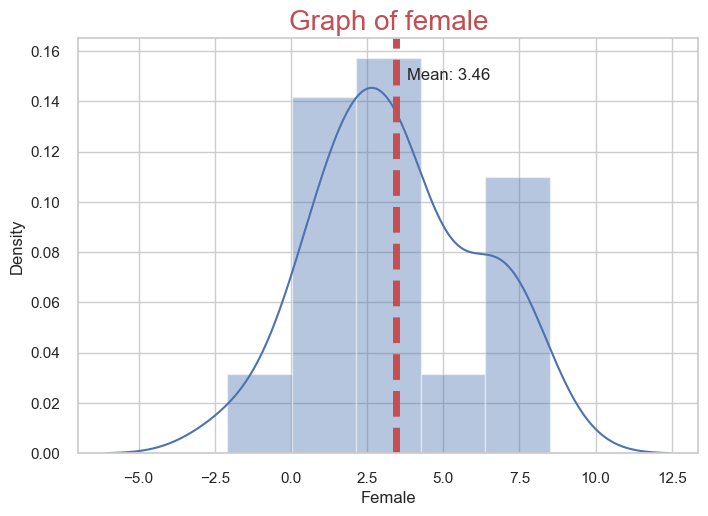

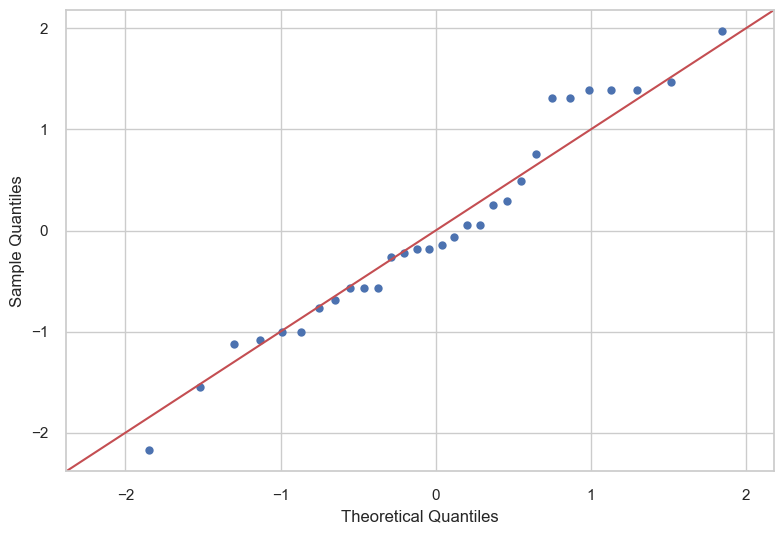

In [157]:
hist(female)
plt.title('Graph of female',  size=20, color='r')
sm.qqplot(standadize(female), line ='45')
plt.tight_layout()
plt.show()

In [158]:
stf, pf = stats.shapiro(female)
print('statistic of Diet female = ',stf)
print('pvalue of Diet female = ',pf)
if (pf > 0.05):
    print("Không có bằng chứng để bác bỏ H0: female là dữ liệu tuân theo phân phối chuẩn ")
    print('Điều này ngụ ý là: female là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: female là dữ liệu phân phối chuẩn')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('female không phải là dữ liệu tuân theo phân phối chuẩn')
print('-'*50)

statistic of Diet female =  0.9627355337142944
pvalue of Diet female =  0.3631637692451477
Không có bằng chứng để bác bỏ H0: female là dữ liệu tuân theo phân phối chuẩn 
Điều này ngụ ý là: female là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


  ##  Phát biểu giả thiết:

$H_0$: male là dữ liệu tuân theo phân phối chuẩn

$H_a$: male không phải là dữ liệu tuân theo phân phối chuẩn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


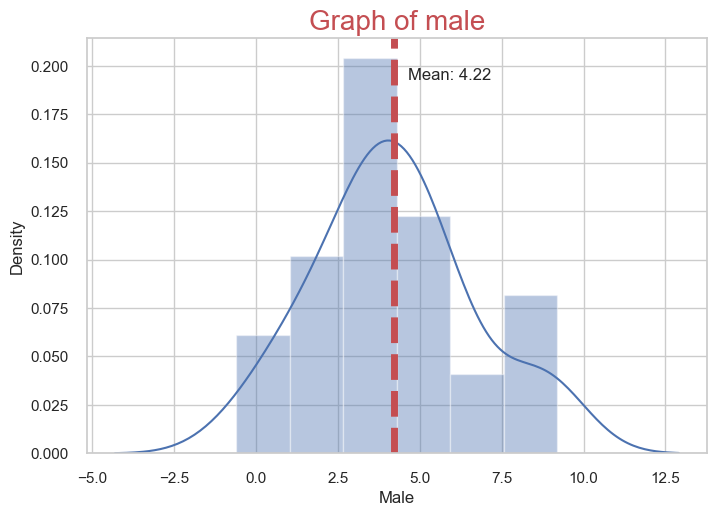

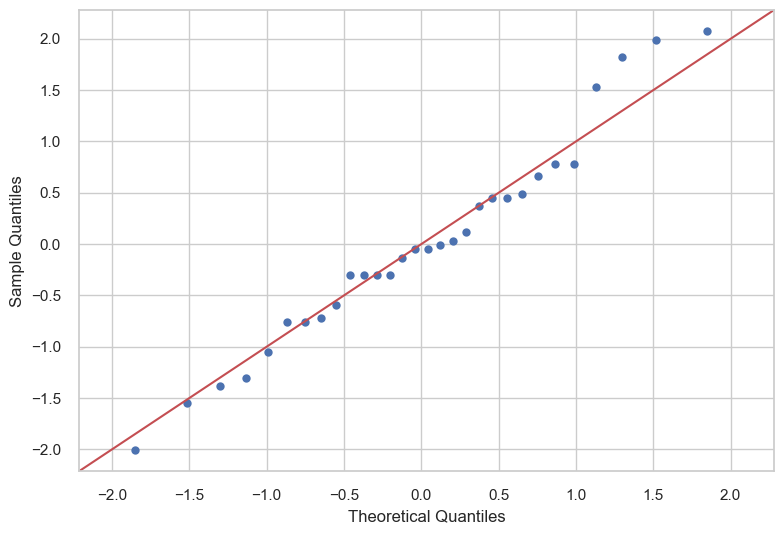

In [159]:
hist(male)
plt.title('Graph of male',  size=20, color='r')
sm.qqplot(standadize(male), line ='45')
plt.tight_layout()
plt.show()

In [160]:
stm, pm = stats.shapiro(male)
print('statistic of Diet female = ',stm)
print('pvalue of Diet female = ',pm)
if (pm > 0.05):
    print("Không có bằng chứng để bác bỏ H0: male là dữ liệu tuân theo phân phối chuẩn ")
    print('Điều này ngụ ý là: male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: male là dữ liệu phân phối chuẩn')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('male không phải là dữ liệu tuân theo phân phối chuẩn')
print('-'*50)

statistic of Diet female =  0.9706353545188904
pvalue of Diet female =  0.5567038655281067
Không có bằng chứng để bác bỏ H0: male là dữ liệu tuân theo phân phối chuẩn 
Điều này ngụ ý là: male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [161]:
stfm, pfm = stats.bartlett(female, male)
print('statistic by Bartlett = ',stfm)
print('pvalue by Bartlett = ',pfm)
if (pfm > 0.05):
    print('Không có bằng chứng để bác bỏ H0: Các feature đều có phương sai đồng nhất')
    print('Điều này ngụ ý: Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho: Các feature đều có phương sai đồng nhất')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')
print('-'*50)

statistic by Bartlett =  0.11381817568948516
pvalue by Bartlett =  0.7358383780614005
Không có bằng chứng để bác bỏ H0: Các feature đều có phương sai đồng nhất
Điều này ngụ ý: Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA
--------------------------------------------------


## Phân tích ANOVA

### Xây dựng giả thuyết:

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [162]:
# Tiến hành phân tích ANOVA 1 chiềup={}
from scipy.stats import f_oneway
st, p = f_oneway(type1, type2, type3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")
    print("Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt")


Giá trị kiểm định:  4.522388499381366
p_value:  0.015032692032602433
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


In [163]:
# ANOVA Table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightlost ~ C(gender)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


### Hậu kiểm ANOVA

In [164]:
# Hậu kiểm ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['weightlost'],
                          groups=df['gender'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.1221,0.8397,-1.0408,1.2851,False


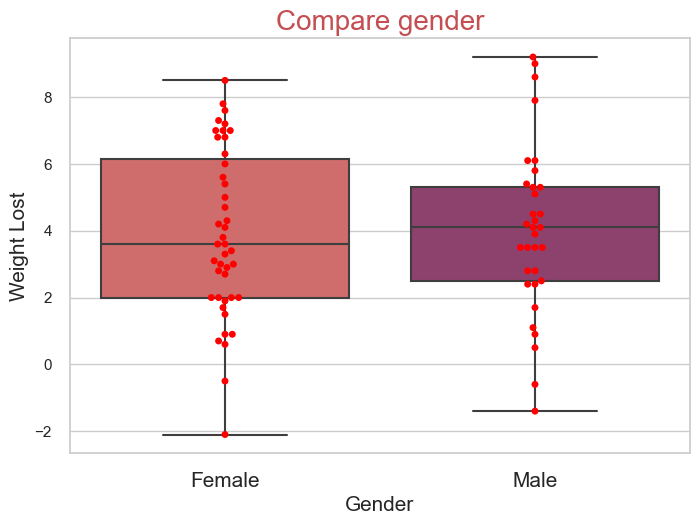

In [165]:
### Kỹ thuật EDA:
dt = dt.replace(to_replace =['0','1'], 
                            value =['Female','Male'])
sns.boxplot(x='gender', y='weightlost', data=dt, palette='flare')
sns.swarmplot(x="gender", y="weightlost", data=dt, color='red')
plt.title('Compare gender',  size=20, color='r')
plt.xticks(size=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Weight Lost',fontsize=15)
plt.show()

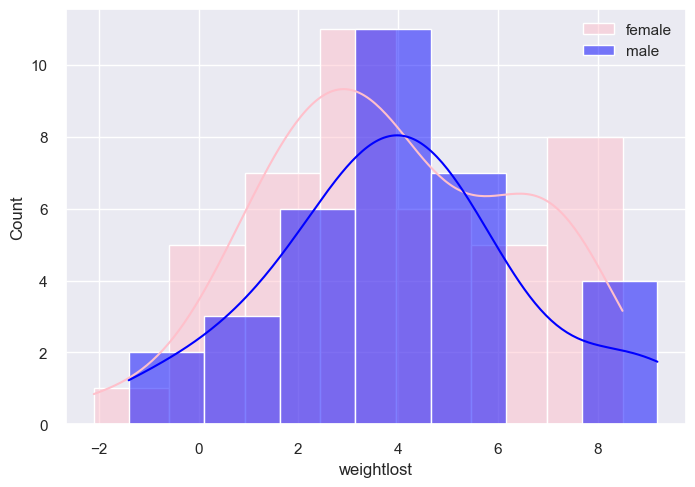

In [175]:
female = df[df['gender'] == 0]
male = df[df['gender'] == 1]


sns.set(style='darkgrid')
sns.histplot(data = female, x  ="weightlost",color="pink", label = "female", kde=True)
sns.histplot(data = male, x = "weightlost",color="blue", label = "male", kde=True)
plt.legend()
plt.show()

# Task5: Two-way ANOVA (perform)
### Effect of diet and gender on weight lost

In [166]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('weightlost ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Diet),60.417220,2.0,5.619026,0.005456
C(gender),0.168696,1.0,0.031379,0.859910
C(Diet):C(gender),33.904068,2.0,3.153204,0.048842
Residual,376.329043,70.0,NaN,NaN


# Task6: Interactions
### Means plot of weight lost by diet and gender

In [167]:
task6 = df[['Diet', 'gender', 'weightlost']]
Diet = df['Diet']
Gender = df['gender']
weightlost = df['weightlost']
print(task6)

        Diet  gender  weightlost
Person                          
1          1       0         3.8
2          1       0         6.0
3          1       0         0.7
4          1       0         2.9
5          1       0         2.8
...      ...     ...         ...
74         3       1         2.8
75         3       1         4.1
76         3       1         5.3
77         3       1         9.2
78         3       1         6.1

[76 rows x 3 columns]


Text(0.5, 1.0, 'Means plot of weight lost by diet and gender')

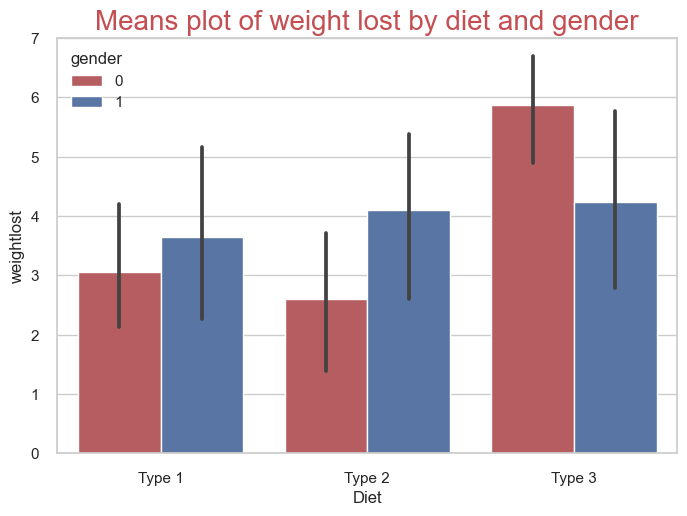

In [168]:
sns.set_theme(style="whitegrid")
g=sns.barplot(x="Diet", y="weightlost", hue="gender", data=task6, palette=['r','b'])
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
g.set(ylim=(0, 7))
plt.title('Means plot of weight lost by diet and gender', size=20, color = 'r')

# Task7: ANCOVA
### Add height to either ANOVA

In [169]:
df['gender'] = pd.to_numeric(df['gender'])

In [170]:
from pingouin import ancova
ancova(data=df, dv='weightlost', covar='Diet', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,0.141138,1,0.024210,0.876782,0.000332
1,Diet,45.072302,1,7.731316,0.006899,0.095766
2,Residual,425.578029,73,NaN,NaN,NaN


## test ANOVA assumptions

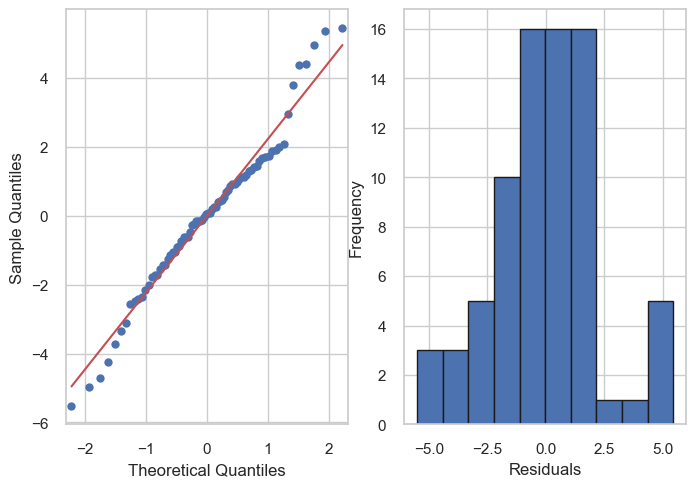

In [75]:
fig, ax = plt.subplots(1, 2)
sm.qqplot(model.resid, line = 's', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins = 'auto', histtype = 'bar', ec = 'k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.show()
